In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import os
from pmdarima.arima import auto_arima

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [2]:
df_Grus_grus= pd.read_csv("df_Grus_grus")

In [3]:
df_Grus_grus.head()

,Unnamed: 0,eventDate,year,month,day,continent,Country,City,Specie
0,0,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
1,1,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2,2,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
3,3,2010-09-11T10:00:00,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
4,4,2010-09-11T10:00:00,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus


In [4]:
df_Grus_grus["eventDate"] = pd.to_datetime(df_Grus_grus["eventDate"])

df_Grus_grus["eventDate"]= df_Grus_grus["eventDate"].dt.strftime('%Y/%m/%d')

In [5]:
df_Grus_grus.drop("Unnamed: 0", axis =1, inplace = True)

In [6]:
df_Grus_grus.set_index(df_Grus_grus["eventDate"], inplace=True)

In [7]:
# df_ciconia_ciconia.drop(["eventDate"], axis= 1, inplace = True)

In [8]:
df_Grus_grus

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus
...,...,...,...,...,...,...,...,...
2022/04/15,2022/04/15,2022,4,15,EUROPE,Estonia,Saare,Grus grus
2022/04/15,2022/04/15,2022,4,15,EUROPE,Russia,Pskov,Grus grus
2022/04/15,2022/04/15,2022,4,15,EUROPE,Estonia,Tartu,Grus grus


# SQL connector

In [10]:
import mysql.connector as sql    # intsall mysql-connector-python not sql-connector

In [11]:
hostname="localhost"
dbname="cdac_project"
uname="root"
pwd="manager"

In [12]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [13]:
# df_Grus_grus.to_sql(f'df_Grus_grus_24_12', engine, index=False)

In [14]:
# this we shifted below
mydb = sql.connect(
    host="localhost", user="root", password="manager", database="cdac_project"
)



In [15]:
def query(query):
    mycursor = mydb.cursor()
    sql = query
    mycursor.execute(sql)
    result = mycursor.fetchall()
    mycursor.close()

    return pd.DataFrame(result)

In [16]:
df_Grus_grus.head()

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus


In [17]:
df_observation = query("SELECT COUNT(eventDate), eventDate as daily_spotting  FROM df_Grus_grus_24_12 GROUP BY daily_spotting ORDER BY eventDate")


In [18]:
df_observation.rename({0:"daily_frequency",1:"date",2:"country",3:"city",4:"continent"},axis = 1, inplace=True)

In [19]:
df_observation

,daily_frequency,date
0,3,2010/09/10
1,3,2010/09/11
2,3,2010/09/12
3,3,2010/09/13
4,3,2010/09/14
...,...,...
3573,96,2022/04/11
3574,95,2022/04/12
3575,92,2022/04/13
3576,88,2022/04/14


In [20]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578 entries, 0 to 3577
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   daily_frequency  3578 non-null   int64 
 1   date             3578 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.0+ KB


In [21]:
pd.to_datetime(df_observation["date"])

0      2010-09-10
1      2010-09-11
2      2010-09-12
3      2010-09-13
4      2010-09-14
          ...    
3573   2022-04-11
3574   2022-04-12
3575   2022-04-13
3576   2022-04-14
3577   2022-04-15
Name: date, Length: 3578, dtype: datetime64[ns]

In [22]:
df_observation

,daily_frequency,date
0,3,2010/09/10
1,3,2010/09/11
2,3,2010/09/12
3,3,2010/09/13
4,3,2010/09/14
...,...,...
3573,96,2022/04/11
3574,95,2022/04/12
3575,92,2022/04/13
3576,88,2022/04/14


In [23]:
df_demo = df_observation.copy()

In [24]:
df_demo.set_index("date", inplace=True)

In [25]:
# df_demo.drop("date", axis =1, inplace = True)
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [26]:
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [27]:
# del df_demo["country"],df_demo["city"],df_demo["continent"]

In [28]:
df_demo.index.freq = "D"

In [29]:
df_demo

,daily_frequency
date,
2010/09/10,3
2010/09/11,3
2010/09/12,3
2010/09/13,3
2010/09/14,3
...,...
2022/04/11,96
2022/04/12,95
2022/04/13,92


In [30]:
size = int(len(df_demo)*0.8)

df_train = df_demo.iloc[:size]
df_test  = df_demo.iloc[size:]

In [31]:
df_train.tail()

,daily_frequency
date,
2020/03/14,387
2020/03/15,399
2020/03/16,375
2020/03/17,330
2020/03/18,385


In [32]:
df_test.head()

,daily_frequency
date,
2020/03/19,366
2020/03/20,343
2020/03/21,343
2020/03/22,360
2020/03/23,369


In [33]:
df_train.isnull().sum()

daily_frequency    0
dtype: int64

<Axes: xlabel='date'>

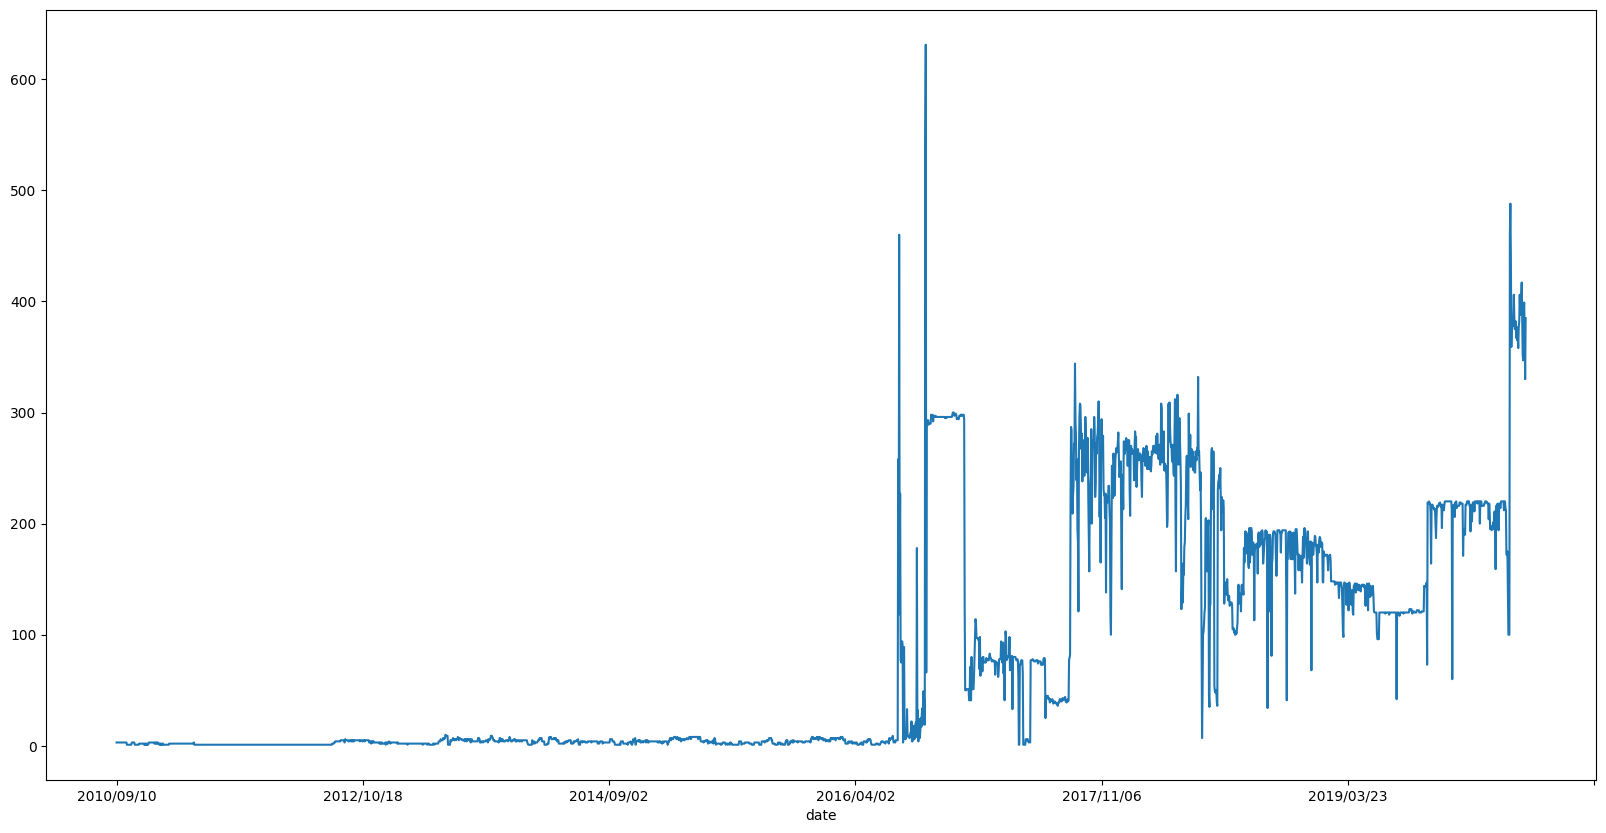

In [34]:
plt.figure(figsize=(20,10))
df_train.daily_frequency.plot()

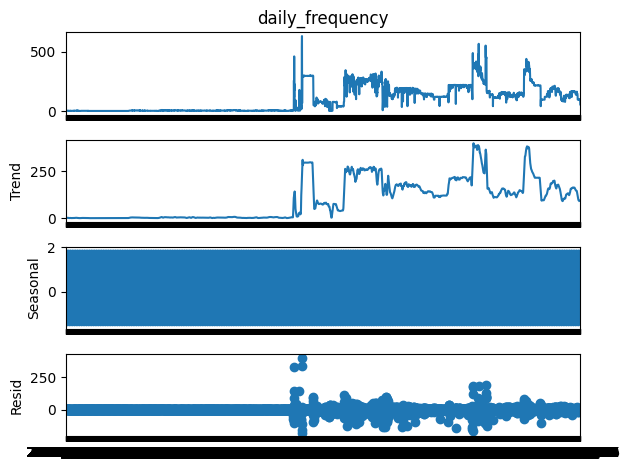

In [33]:
dec=seasonal_decompose(df_demo["daily_frequency"],period=12)
dec.plot()
plt.show()

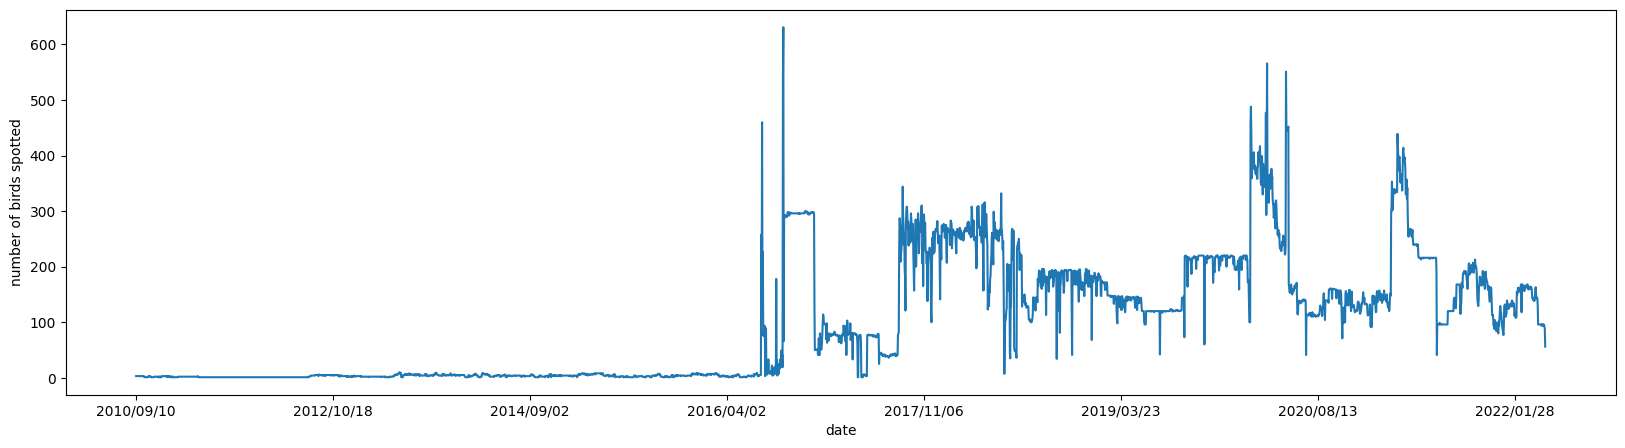

In [34]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('number of birds spotted')
df_demo["daily_frequency"].plot()
# plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


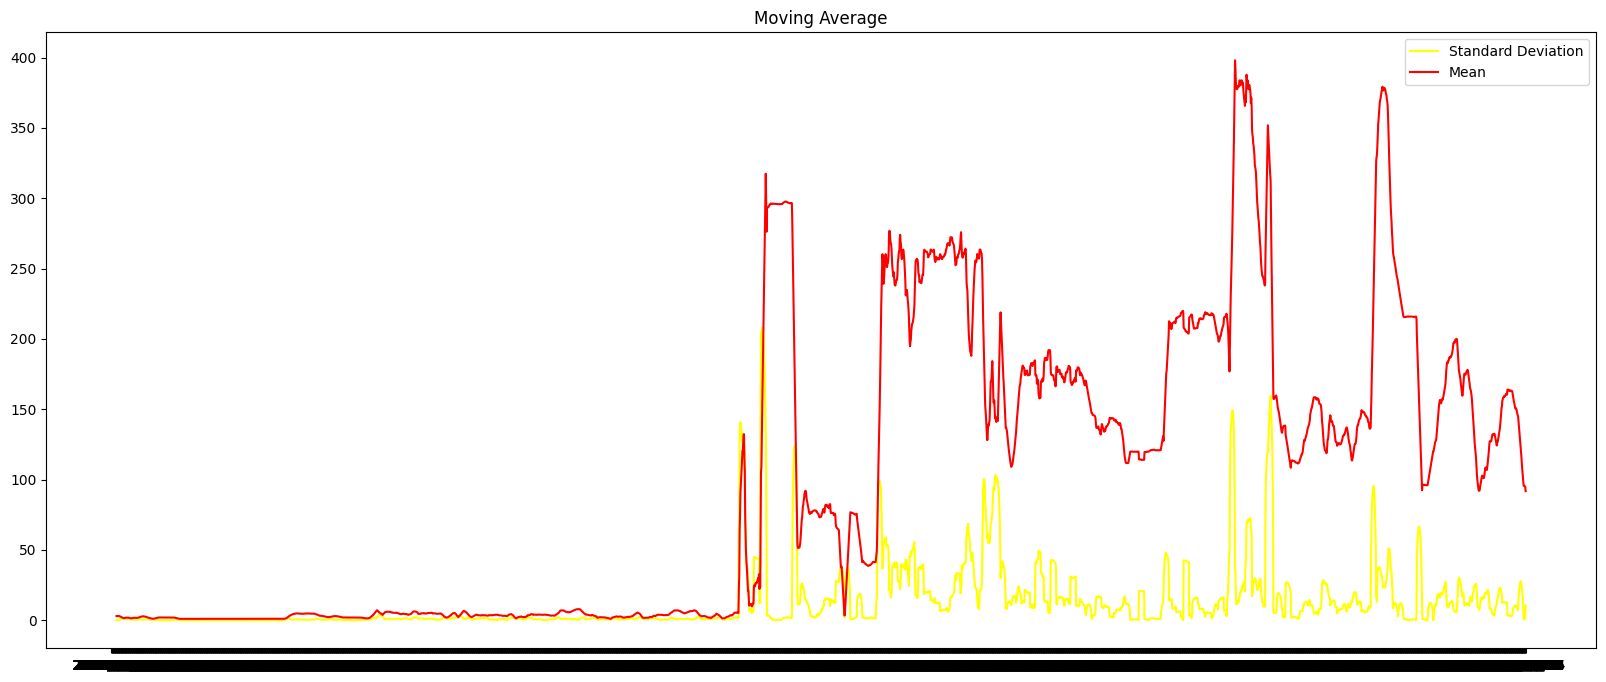

In [35]:
from pylab import rcParams

rcParams["figure.figsize"] = 20,8
moving_avg = df_demo.rolling(14).mean()
moving_std = df_demo.rolling(14).std()

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(moving_std, color ="yellow", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

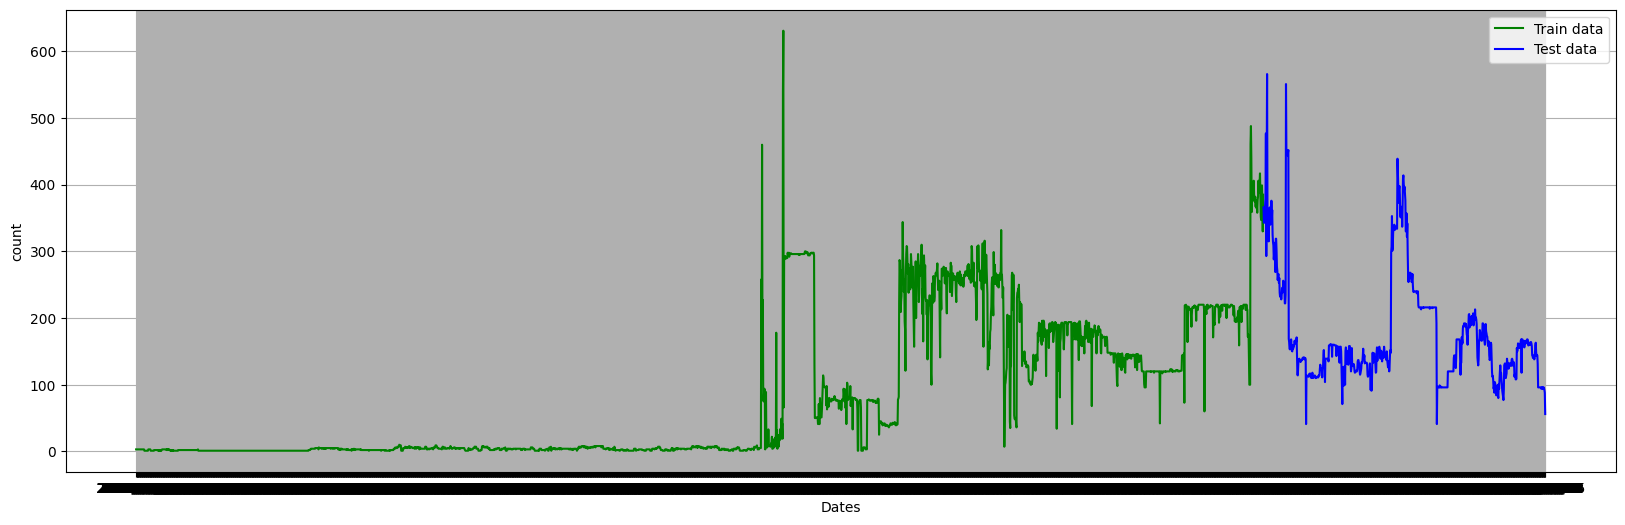

In [36]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('count')
plt.plot(df_train, 'green', label='Train data')
plt.plot(df_test , 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36039.460, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=26895.775, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=32975.217, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=26730.553, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26554.568, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26642.524, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=26555.009, Time=0.40 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26554.615, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26575.625, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=26557.695, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=26553.442, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26637.777, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=26721.458, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] i

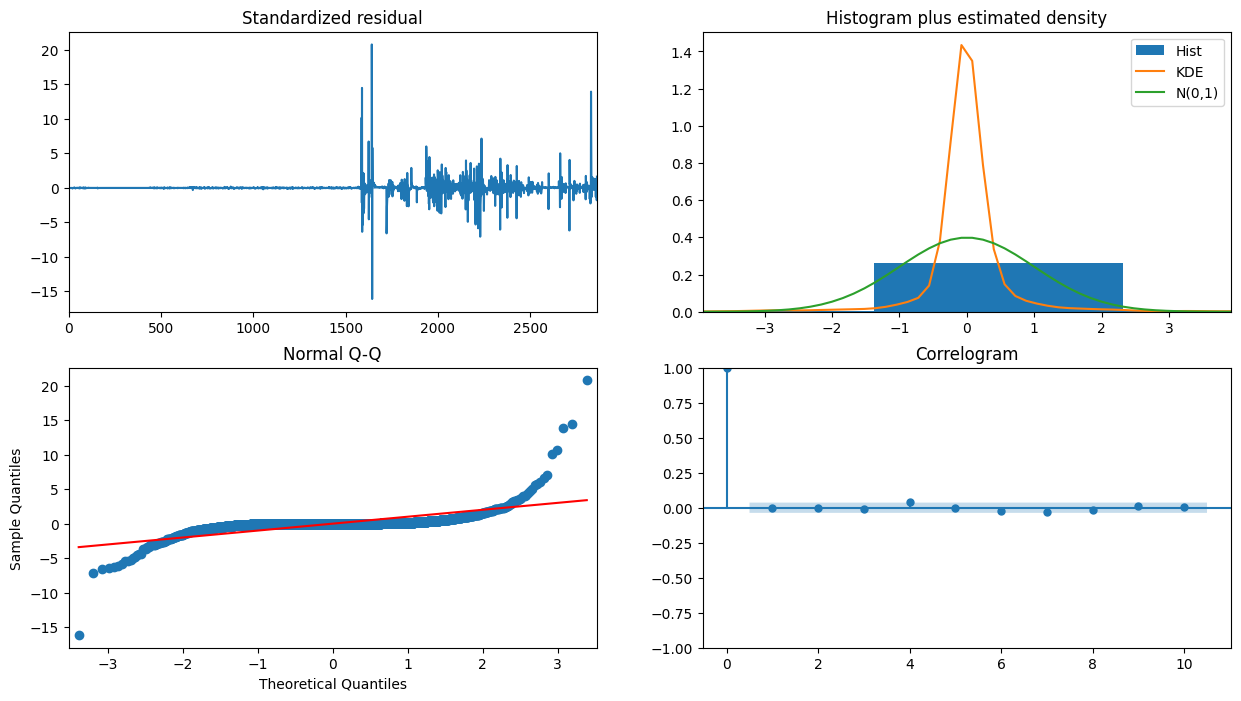

In [37]:
model_autoARIMA = auto_arima(df_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

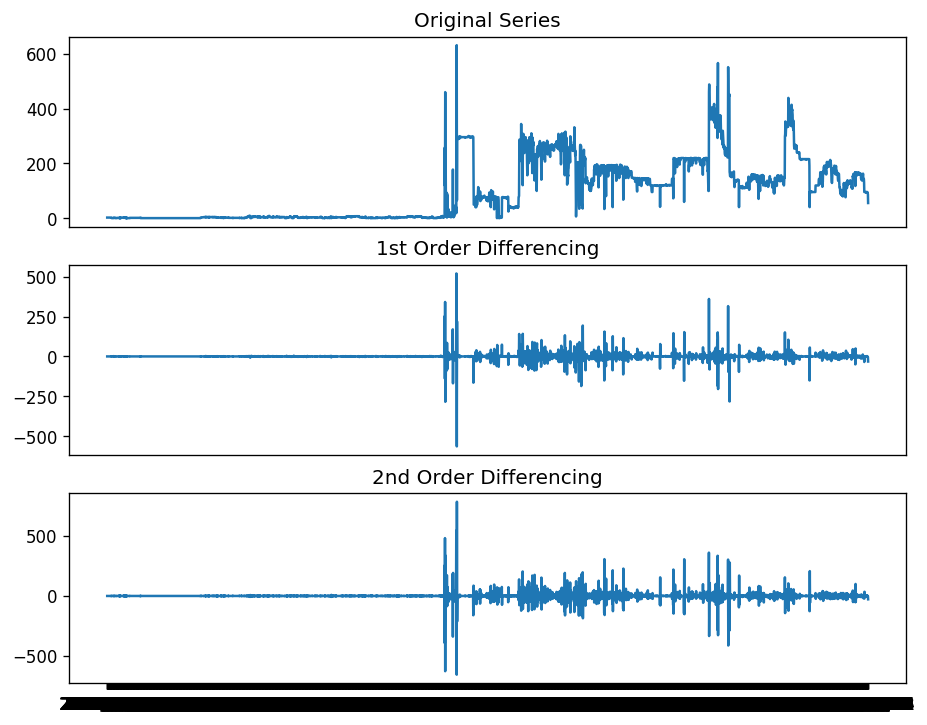

In [38]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_demo["daily_frequency"]); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_demo["daily_frequency"].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_demo["daily_frequency"].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

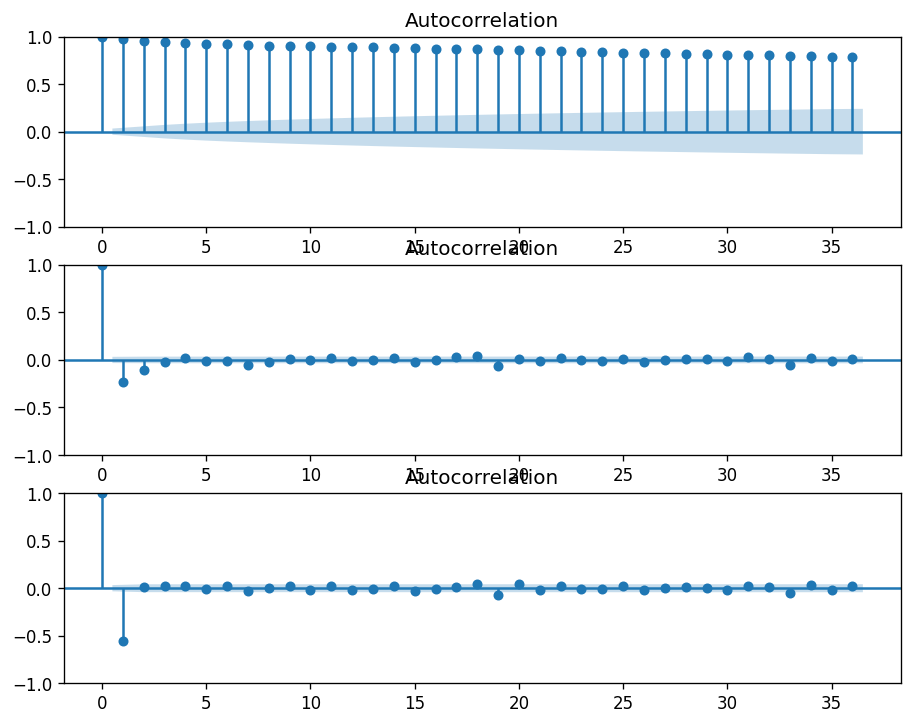

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_demo["daily_frequency"], ax=ax1)
plot_acf(df_demo["daily_frequency"].diff().dropna(), ax=ax2)
plot_acf(df_demo["daily_frequency"].diff().diff().dropna(), ax=ax3)
plt.show()

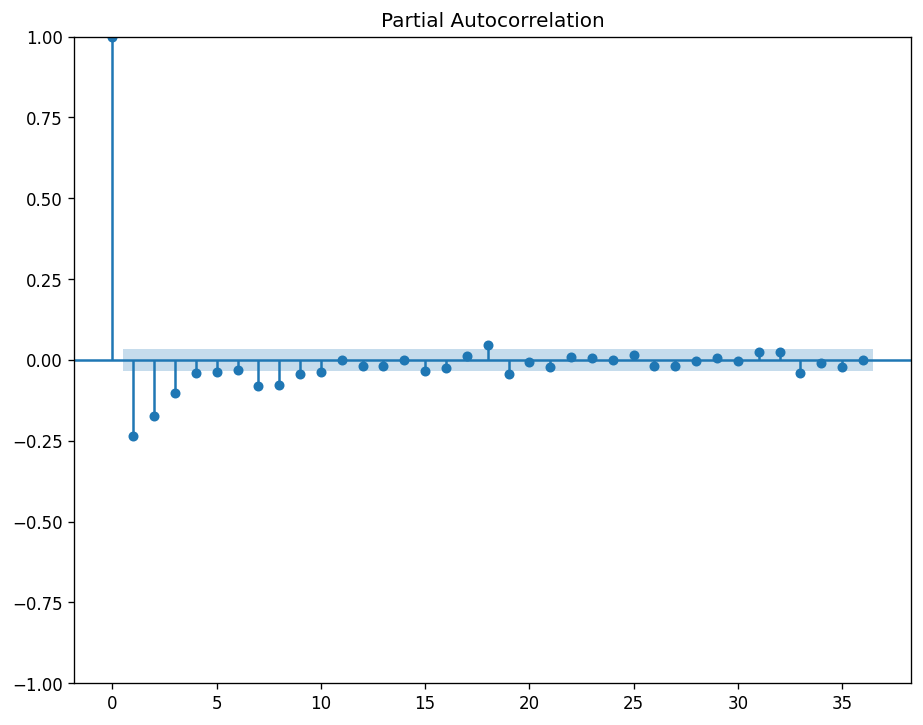

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_demo["daily_frequency"].diff().dropna())
plt.show()

In [41]:
def TestStationaryPlot(fd):
    rol_mean = fd.rolling(window = 20, center = False).mean()
    rol_std = fd.rolling(window = 20, center = False).std()
    
    plt.plot(fd, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

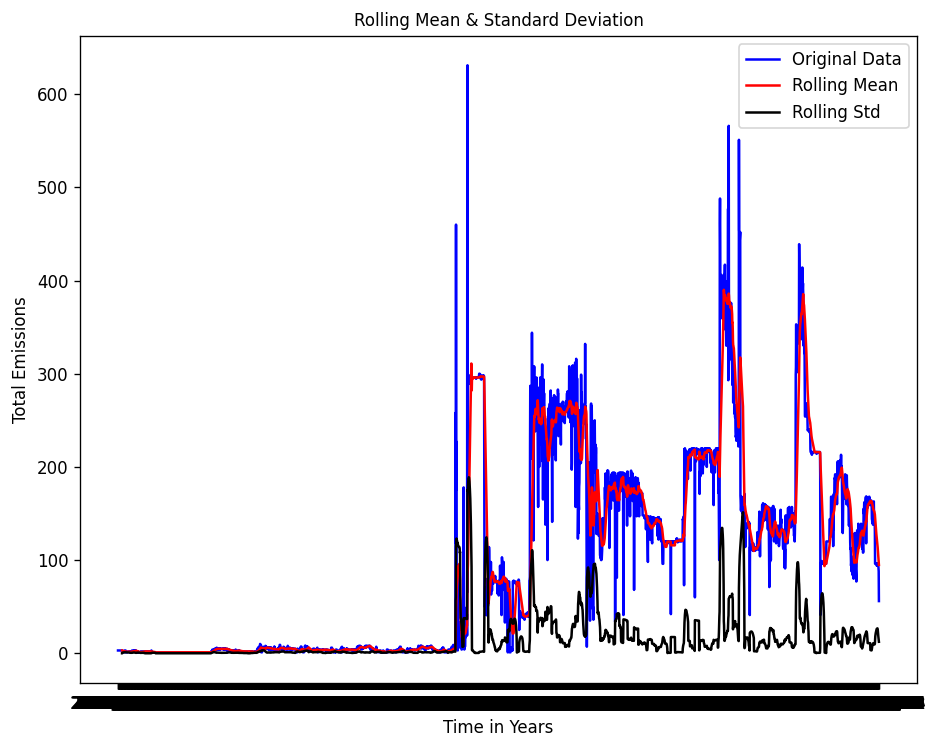

In [42]:
TestStationaryPlot(df_demo)

In [43]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary
def TestStationaryAdfuller(fd, cutoff = 0.01):
    fd_test = adfuller(fd, autolag = 'AIC')
    fd_test_output = pd.Series(fd_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    
    for key,value in fd_test[4].items():
        fd_test_output['Critical Value (%s)'%key] = value
    print(fd_test_output)
    
    if fd_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")
        

In [44]:
TestStationaryAdfuller(df_demo)

Test Statistic                   -3.040447
p-value                           0.031286
Lags Used                        19.000000
Number of Observations Used    3558.000000
Critical Value (1%)              -3.432189
Critical Value (5%)              -2.862353
Critical Value (10%)             -2.567203
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


## Moving Average Method

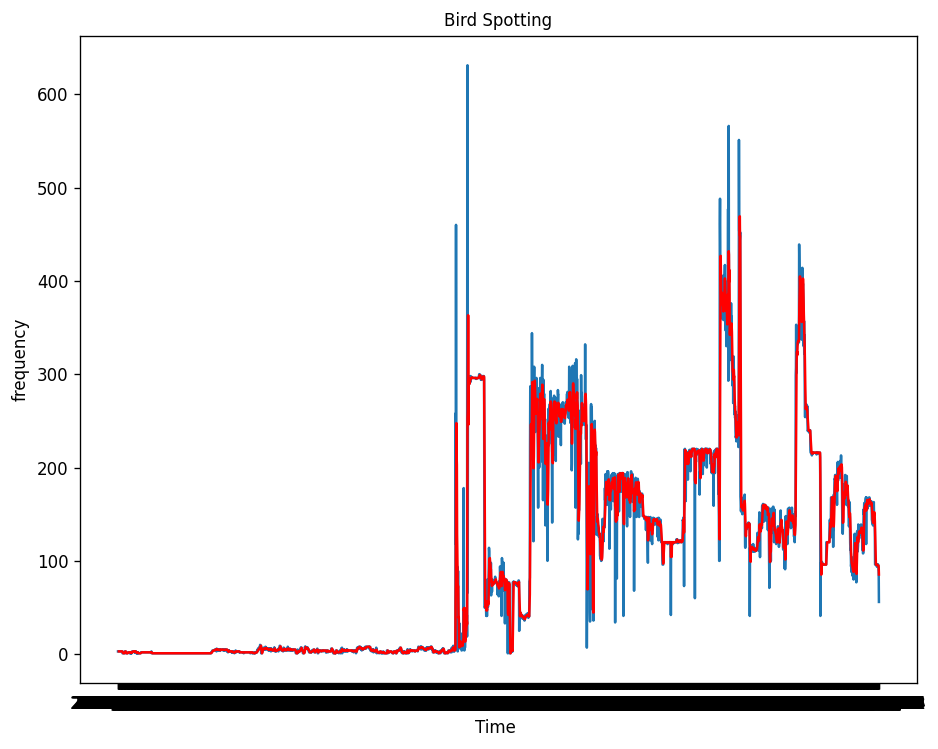

In [45]:
moving_avg = df_demo["daily_frequency"].rolling(5).mean()
plt.plot(df_demo["daily_frequency"])
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time ', fontsize = 10)
plt.ylabel('frequency', fontsize = 10)
plt.title('Bird Spotting', fontsize = 10)
plt.show()

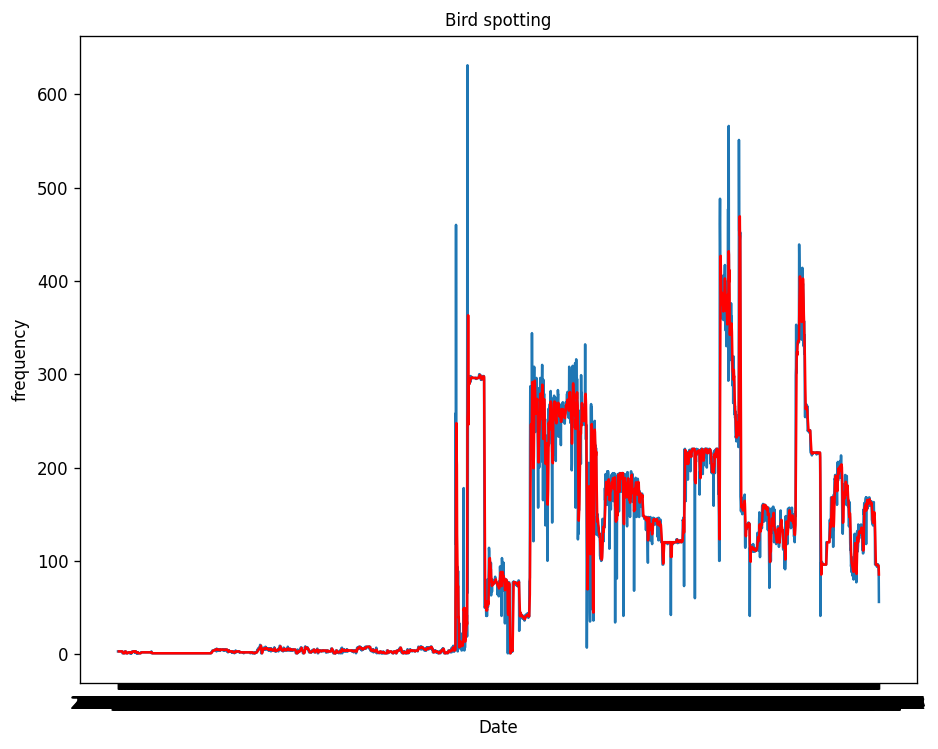

date
2010/09/10    NaN
2010/09/11    NaN
2010/09/12    NaN
2010/09/13    NaN
2010/09/14    0.0
2010/09/15    0.0
2010/09/16    0.0
2010/09/17    0.0
2010/09/18    0.0
2010/09/19    0.0
2010/09/20    0.0
2010/09/21    0.0
2010/09/22    0.0
Name: daily_frequency, dtype: float64

In [46]:
moving_avg = df_demo["daily_frequency"].rolling(5).mean()
plt.plot(df_demo)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('frequency', fontsize = 10)
plt.title('Bird spotting', fontsize = 10)
plt.show()
moving_avg_diff = df_demo["daily_frequency"] - moving_avg
moving_avg_diff.head(13)

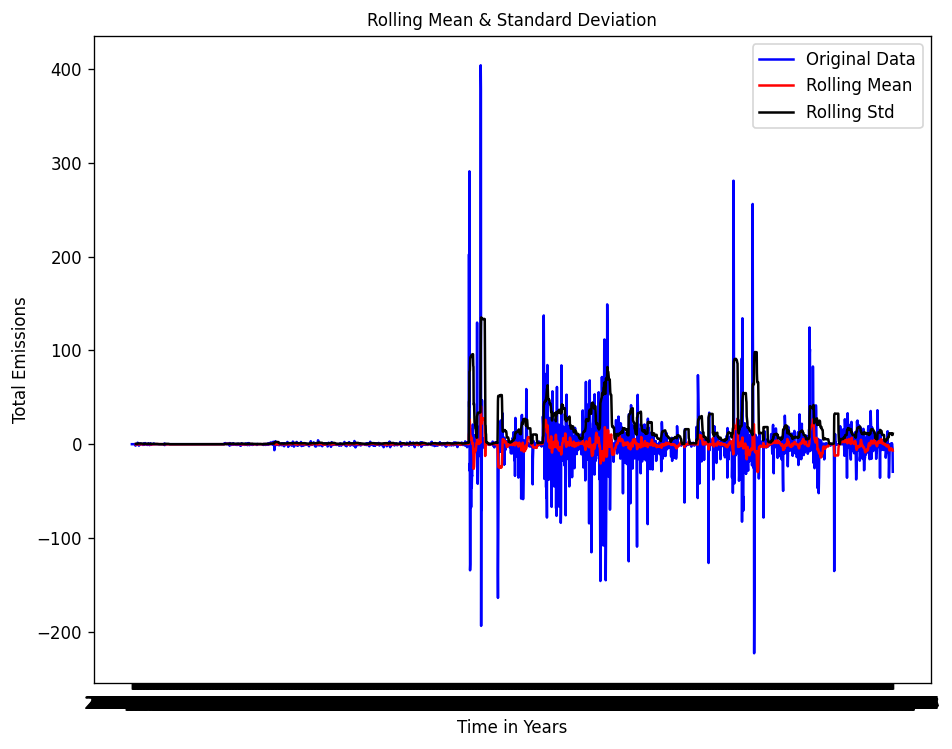

In [47]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [48]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                -1.501543e+01
p-value                        1.040696e-27
Lags Used                      1.900000e+01
Number of Observations Used    3.554000e+03
Critical Value (1%)           -3.432191e+00
Critical Value (5%)           -2.862354e+00
Critical Value (10%)          -2.567203e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


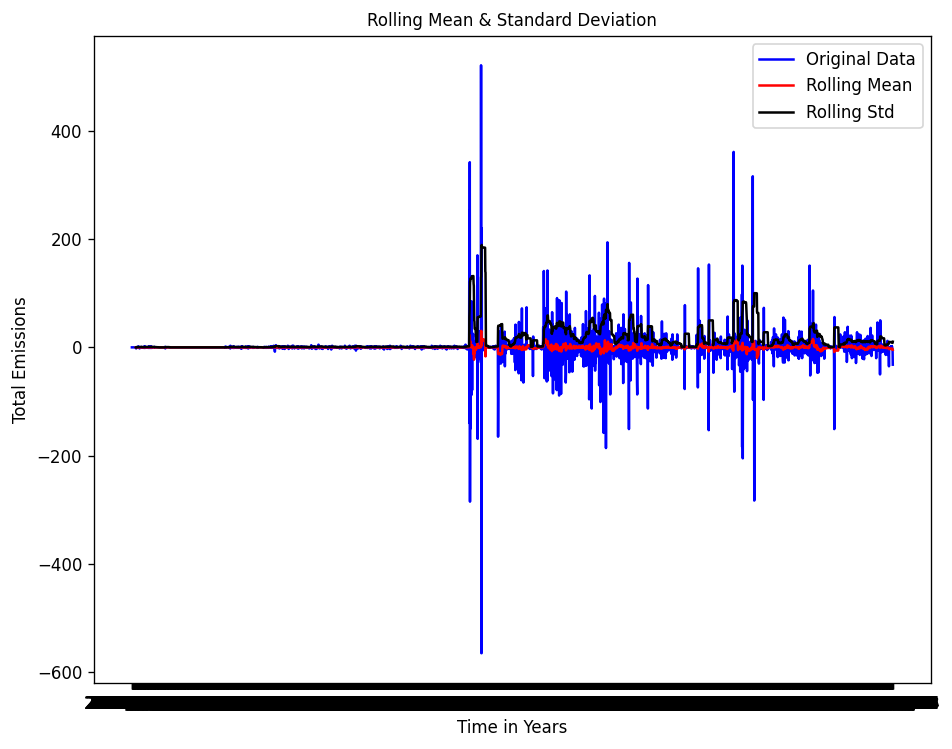

In [49]:
df_first_difference = df_demo["daily_frequency"] - df_demo["daily_frequency"].shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))
# df_demo

In [50]:
df_first_difference.tail(15
                        )

date
2022/04/01     0.0
2022/04/02     0.0
2022/04/03     0.0
2022/04/04     0.0
2022/04/05    -2.0
2022/04/06     2.0
2022/04/07     0.0
2022/04/08    -2.0
2022/04/09     2.0
2022/04/10    -2.0
2022/04/11     2.0
2022/04/12    -1.0
2022/04/13    -3.0
2022/04/14    -4.0
2022/04/15   -32.0
Name: daily_frequency, dtype: float64

In [51]:
TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                -1.644640e+01
p-value                        2.401066e-29
Lags Used                      1.800000e+01
Number of Observations Used    3.558000e+03
Critical Value (1%)           -3.432189e+00
Critical Value (5%)           -2.862353e+00
Critical Value (10%)          -2.567203e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


## ACF & PACF  

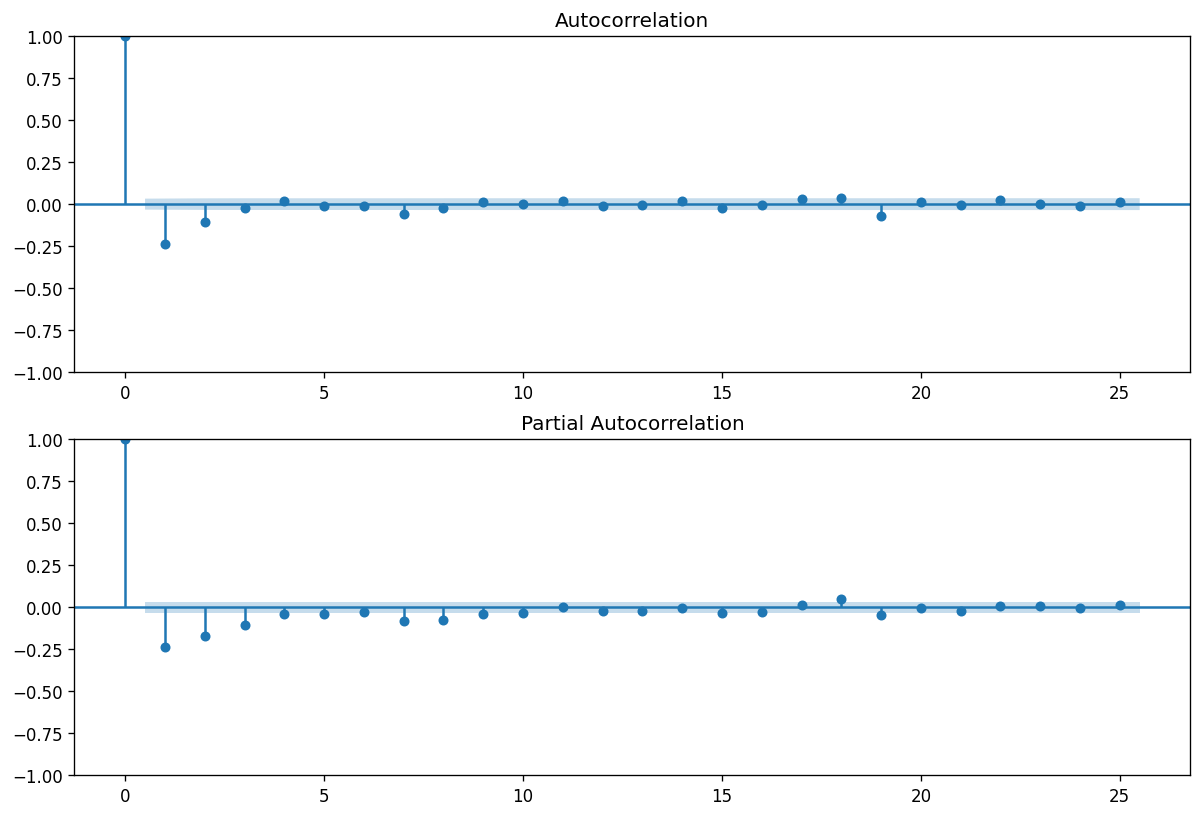

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first_difference.dropna(inplace=False), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first_difference.dropna(inplace=False), lags=25, ax=ax2)

In [53]:



list_pdq = [(4,0,11),(4,0,14),(9,0,11),(9,0,14)]

def forecast_accuracy(forecast, actual):

    
    mape = np.mean(np.abs(forecast - actual)/(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    
    
    return({'mape':mape, 'me':me, 'mae': mae, 'rmse':rmse})

    

In [54]:
from statsmodels.tsa.arima.model import ARIMA

for pdq in list_pdq:
    model = ARIMA(df_train,order=pdq)
    fitted = model.fit()
    
    print(fitted.summary())

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(4, 0, 11)   Log Likelihood              -13258.067
Date:                Tue, 26 Dec 2023   AIC                          26550.134
Time:                        00:11:26   BIC                          26651.442
Sample:                             0   HQIC                         26586.662
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7107    133.534      0.597      0.551    -182.011     341.432
ar.L1          0.7381      0.475      1.555      0.120      -0.192       1.668
ar.L2         -0.3478      0.138     -2.526      0.0

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(4, 0, 14)   Log Likelihood              -13257.532
Date:                Tue, 26 Dec 2023   AIC                          26555.065
Time:                        00:11:45   BIC                          26674.250
Sample:                             0   HQIC                         26598.038
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7074    355.234      0.224      0.822    -616.538     775.953
ar.L1          0.4141      1.118      0.370      0.711      -1.778       2.606
ar.L2         -0.3622      0.689     -0.526      0.5

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(9, 0, 11)   Log Likelihood              -13245.938
Date:                Tue, 26 Dec 2023   AIC                          26535.876
Time:                        00:11:59   BIC                          26666.981
Sample:                             0   HQIC                         26583.147
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7039    154.476      0.516      0.606    -223.064     382.471
ar.L1          0.3165      0.812      0.390      0.697      -1.276       1.909
ar.L2          0.2632      0.127      2.076      0.0

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(9, 0, 14)   Log Likelihood              -13247.895
Date:                Tue, 26 Dec 2023   AIC                          26545.790
Time:                        00:12:22   BIC                          26694.772
Sample:                             0   HQIC                         26599.507
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7040    292.339      0.273      0.785    -493.270     652.678
ar.L1         -0.2092      0.364     -0.575      0.565      -0.922       0.504
ar.L2         -0.5531      0.249     -2.219      0.0

### Considering the fact that overfitting might play a role here,
### ARIMA(9,0,11) would be a model very suitable

In [55]:
final_arima = ARIMA(df_demo["daily_frequency"], order = (9,0,11))
final_arima = final_arima.fit()
final_arima.summary()

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        daily_frequency   No. Observations:                 3578
Model:                ARIMA(9, 0, 11)   Log Likelihood              -16578.700
Date:                Tue, 26 Dec 2023   AIC                          33201.400
Time:                        00:12:33   BIC                          33337.416
Sample:                             0   HQIC                         33249.888
                               - 3578                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.0266     67.448      1.468      0.142     -33.169     231.223
ar.L1          0.0079      0.431      0.018      0.985      -0.837       0.853
ar.L2          0.3245      0.318      1.020      0.308      -0.299       0.948
ar.L3          0.0503      0.128      0.392      0.695      -0.201       0.302
ar.L4          0.3337      0.107      3.132      0.002       0.125       0.542
ar.L5          0.3328      0.056      5.961      0.000       0.223       0.442
ar.L6          0.0180      0.111      0.162      0.871      -0.200       0.236
ar.L7          0.6830      0.075      9.100      0.000       0.536       0.830
ar.L8         -0.1432      0.367     -0.390      0.697      -0.863       0.576
ar.L9         -0.6146      0.322     -1.910      0.056      -1.245       0.016
ma.L1          0.6774      0.431      1.571      0.116      -0.168       1.523
ma.L2          0.2203      0.090      2.439      0.015       0.043       0.397
ma.L3          0.2485      0.170      1.459      0.145      -0.085       0.582
ma.L4         -0.0326      0.099     -0.329      0.743      -0.227       0.162
ma.L5         -0.2790      0.062     -4.488      0.000      -0.401      -0.157
ma.L6         -0.1494      0.100     -1.491      0.136      -0.346       0.047
ma.L7         -0.8204      0.042    -19.507      0.000      -0.903      -0.738
ma.L8         -0.4569      0.369     -1.239      0.215      -1.180       0.266
ma.L9          0.2403      0.089      2.709      0.007       0.066       0.414
ma.L10         0.0692      0.034      2.032      0.042       0.002       0.136
ma.L11         0.0224      0.019      1.160      0.246      -0.015       0.060
sigma2       614.2523      3.828    160.471      0.000     606.750     621.755
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1914379.23
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             308.42   Skew:                             3.40
Prob(H) (two-sided):                  0.00   Kurtosis:                       116.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
final_arima.fittedvalues.tail()
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3578 entries, 2010/09/10 to 2022/04/15
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   daily_frequency  3578 non-null   int64
dtypes: int64(1)
memory usage: 184.9+ KB


In [59]:
import pickle

with open ("arima_reg.pkl","wb") as file:
    pickle.dump(final_arima,file)

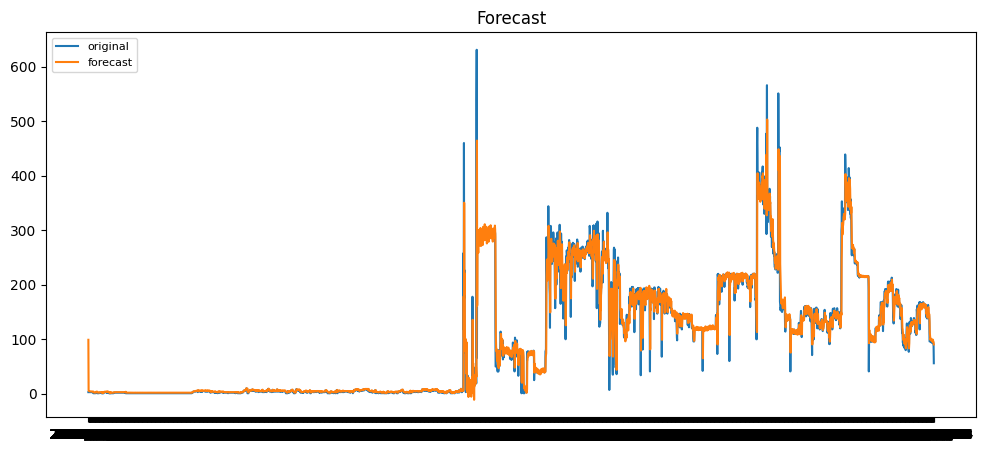

In [62]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_demo, label='original')

plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [76]:
final_arima.predict(start=final_arima.nobs+1, end=final_arima.nobs + 10)   
# predicted values of next 10 observations

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3579    77.135290
3580    76.109302
3581    76.397339
3582    78.163186
3583    79.946602
3584    82.149783
3585    83.263642
3586    84.378165
3587    81.942483
3588    81.495196
Name: predicted_mean, dtype: float64

In [75]:
# ((25-12-2023) - (26-12-2023)).days